# Library

In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

import platform
platform.system()
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

# Code Start

In [64]:
data = pd.read_csv('Ex_CEOSalary.csv')
data.head()

,salary,sales,roe,industry
0,1095,27595.000000,14.1,1
1,1001,9958.000000,10.9,1
2,1122,6125.899902,23.5,1
3,578,16246.000000,5.9,1
4,1368,21783.199219,13.8,1


In [3]:
data.industry = data.industry.replace([1, 2, 3, 4], ['인문', '자연', '공학', '상경'])
data.industry.value_counts()

인문    72
공학    60
자연    46
상경    31
Name: industry, dtype: int64

## Pie Chart

<AxesSubplot:ylabel='industry'>

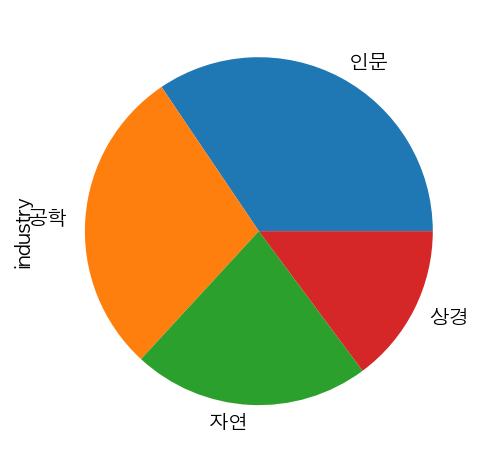

In [4]:
import matplotlib as plt
data.industry.value_counts().plot(kind='pie')

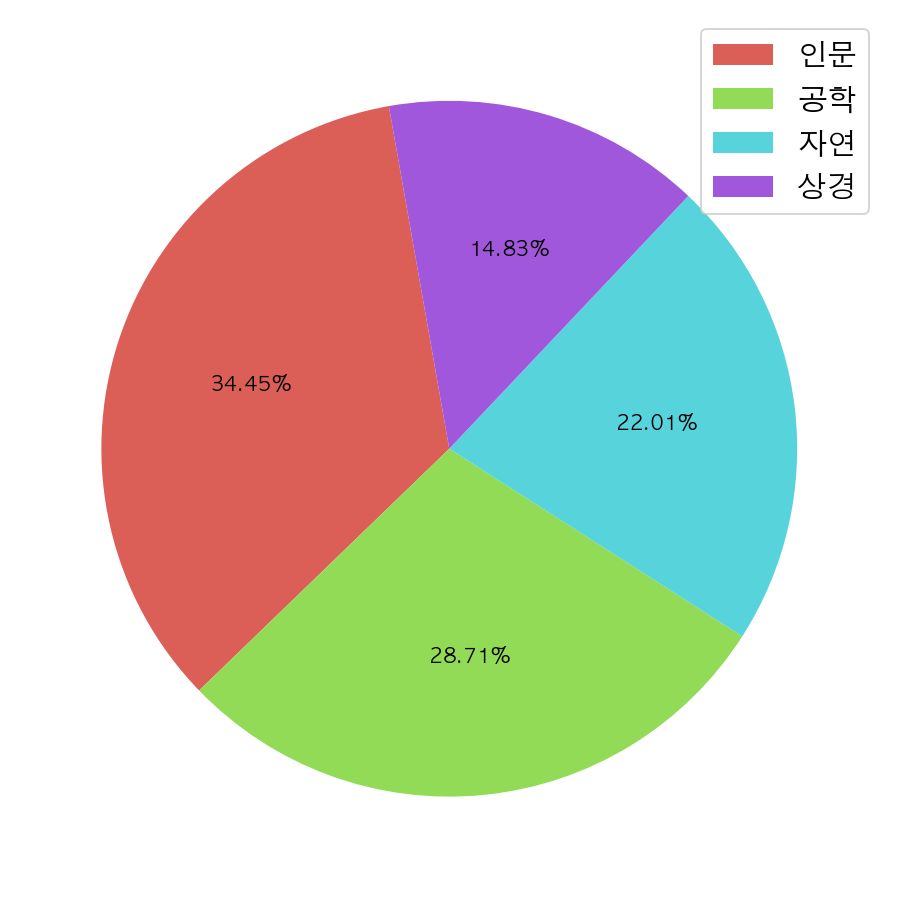

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

 
labels = data.industry.value_counts().keys()
values = data.industry.value_counts().values

colors = sns.color_palette('hls', len(labels))

fig = plt.figure(figsize=(8, 8))
fig.set_facecolor('white')

ax = fig.add_subplot()
pie = ax.pie(values, # 파이차트 출력
       startangle=100, # 시작점을 90도(degree)로 지정
       counterclock=True, # 시계 방향으로 그린다.
       autopct=lambda p : '{:.2f}%'.format(p), ## 퍼센티지 출력
       colors = colors # 색상 지정
     )
 
plt.rc('font', size=15)

plt.legend(pie[0],labels) ## 범례 표시
plt.show()

## bar chart 

<AxesSubplot:>

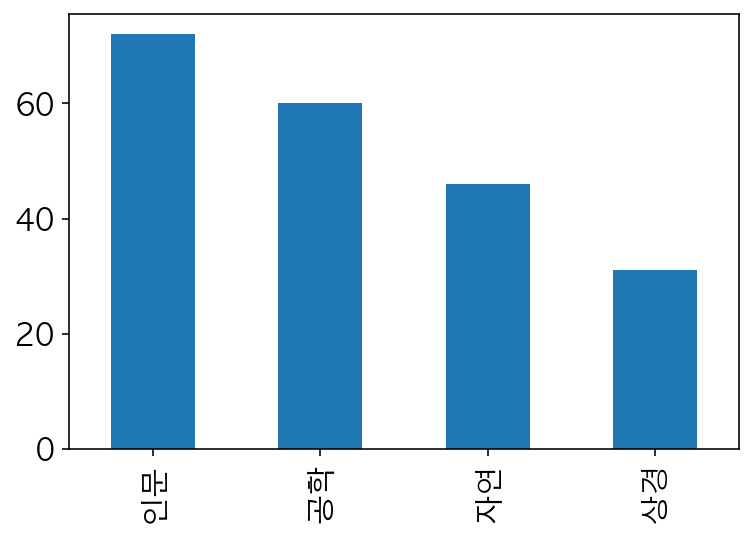

In [6]:
data.industry.value_counts().plot(kind='bar')

<AxesSubplot:>

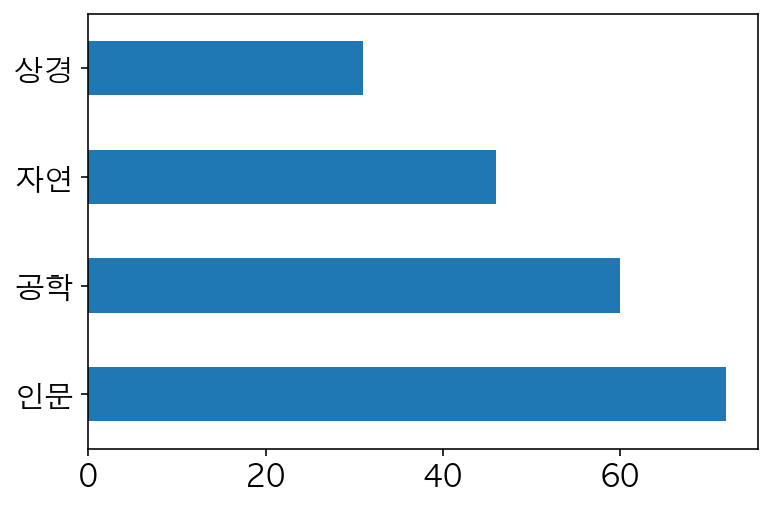

In [7]:
data.industry.value_counts().plot(kind='barh')

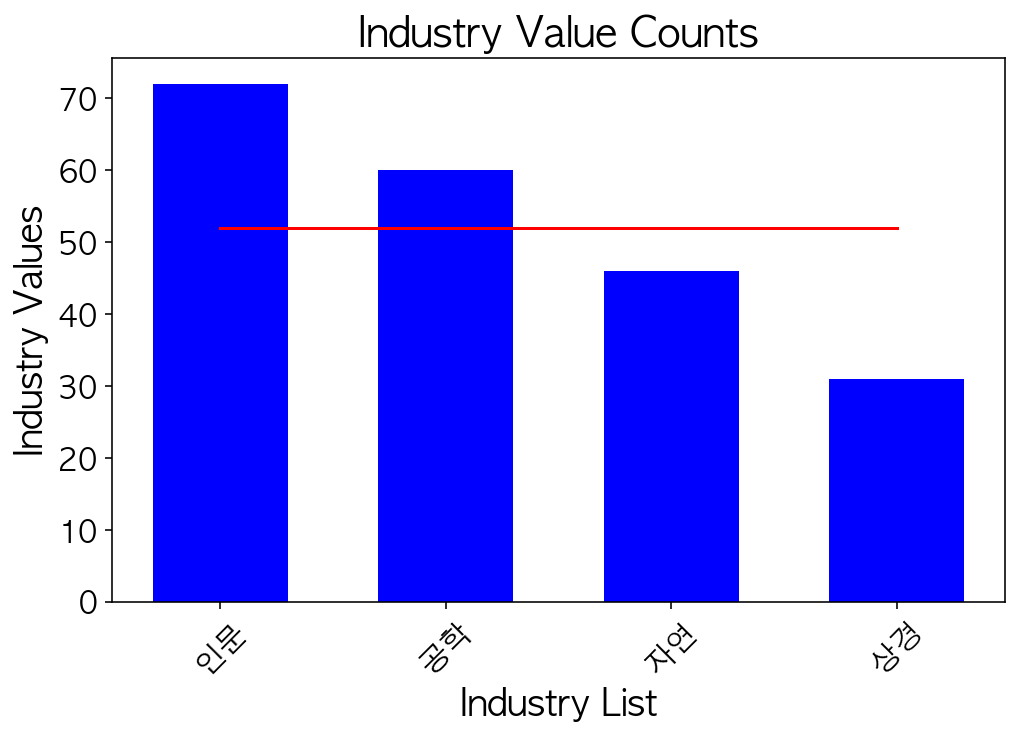

In [9]:
values = data['industry'].value_counts().values
label = data['industry'].value_counts().keys()
# data['industry'].value_counts().index.value 

mean_line = data['industry'].value_counts().mean()
idx = np.arange(len(labels))

mean_list = idx.copy()
mean_list[:] = mean_line

plt.figure(figsize=(8,5))

plt.bar(idx, values, width=0.6, color='blue')
plt.plot(idx, mean_list, color='red')
plt.title('Industry Value Counts', fontsize=20)
plt.xlabel('Industry List', fontsize=18)
plt.ylabel('Industry Values', fontsize=18)
plt.xticks(idx, label, fontsize=15, rotation=45)

plt.show()

## Skew, Kurtosis
- 왜도가 음수면 오른쪽에 자료가 더 많고, 이상치는 작은 값들이 있는 것 <br> 양수면 반대로 왼쪽에 자료가 더 많고 이사이는 큰 값을 갖는다고 볼 수 있음

- 첨도의 값이 클수록 중심에 자료가 많이 몰려 있다는 뜻

In [12]:
print(data.skew())

# 2보다 크고 양의 값으로, 우측꼬리분포.
print('\n', data.kurtosis())

salary    6.904577
sales     5.035336
roe       1.572126
dtype: float64

 salary    58.971229
sales     33.115193
roe        3.797366
dtype: float64


array([[<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'sales'}>],
       [<AxesSubplot:title={'center':'roe'}>, <AxesSubplot:>]],
      dtype=object)

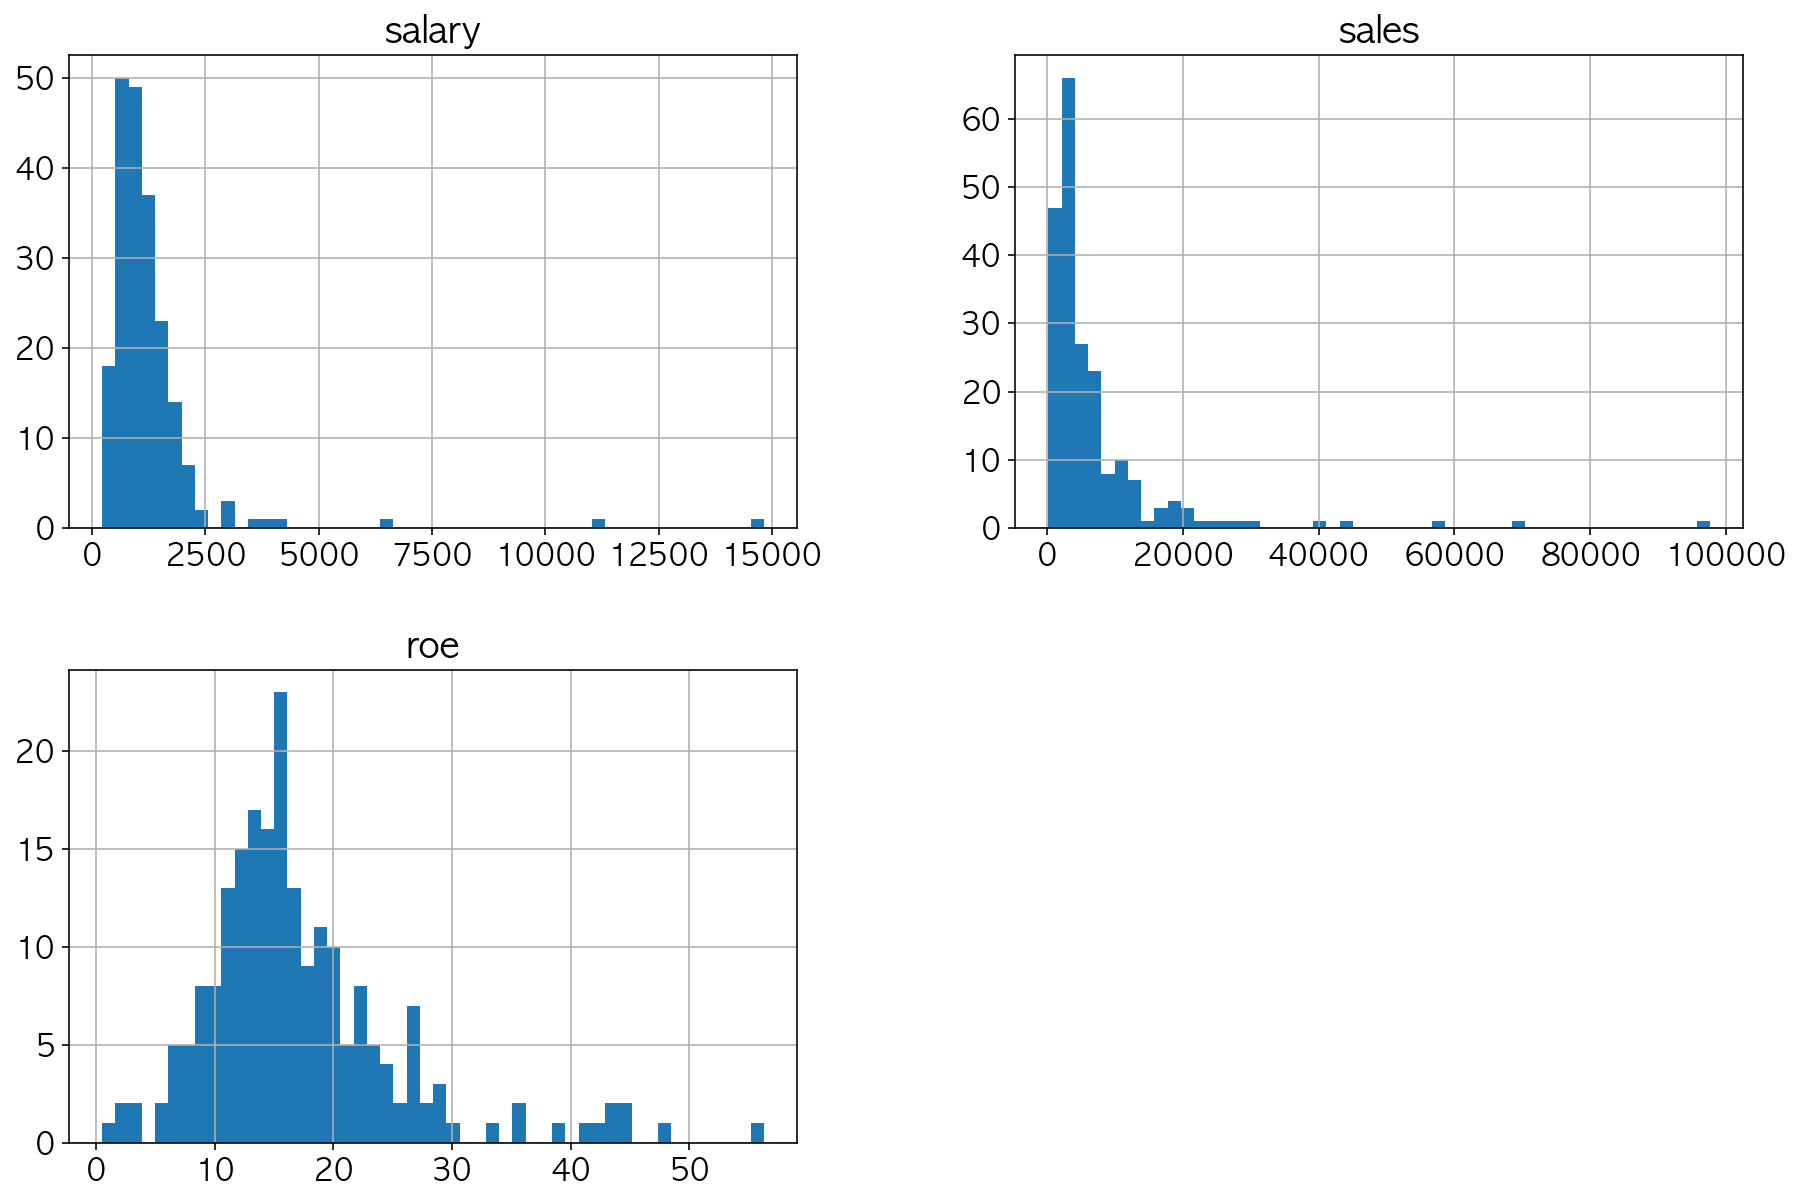

In [14]:
data.hist(bins=50, figsize=(15,10))

## Corr

평균 :  1281.11962
로그 변환 :  6.95039
제곱근 변환 :  33.76518


array([[<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'sales'}>],
       [<AxesSubplot:title={'center':'roe'}>,
        <AxesSubplot:title={'center':'industry'}>],
       [<AxesSubplot:title={'center':'log_salary'}>,
        <AxesSubplot:title={'center':'sqrt_salary'}>]], dtype=object)

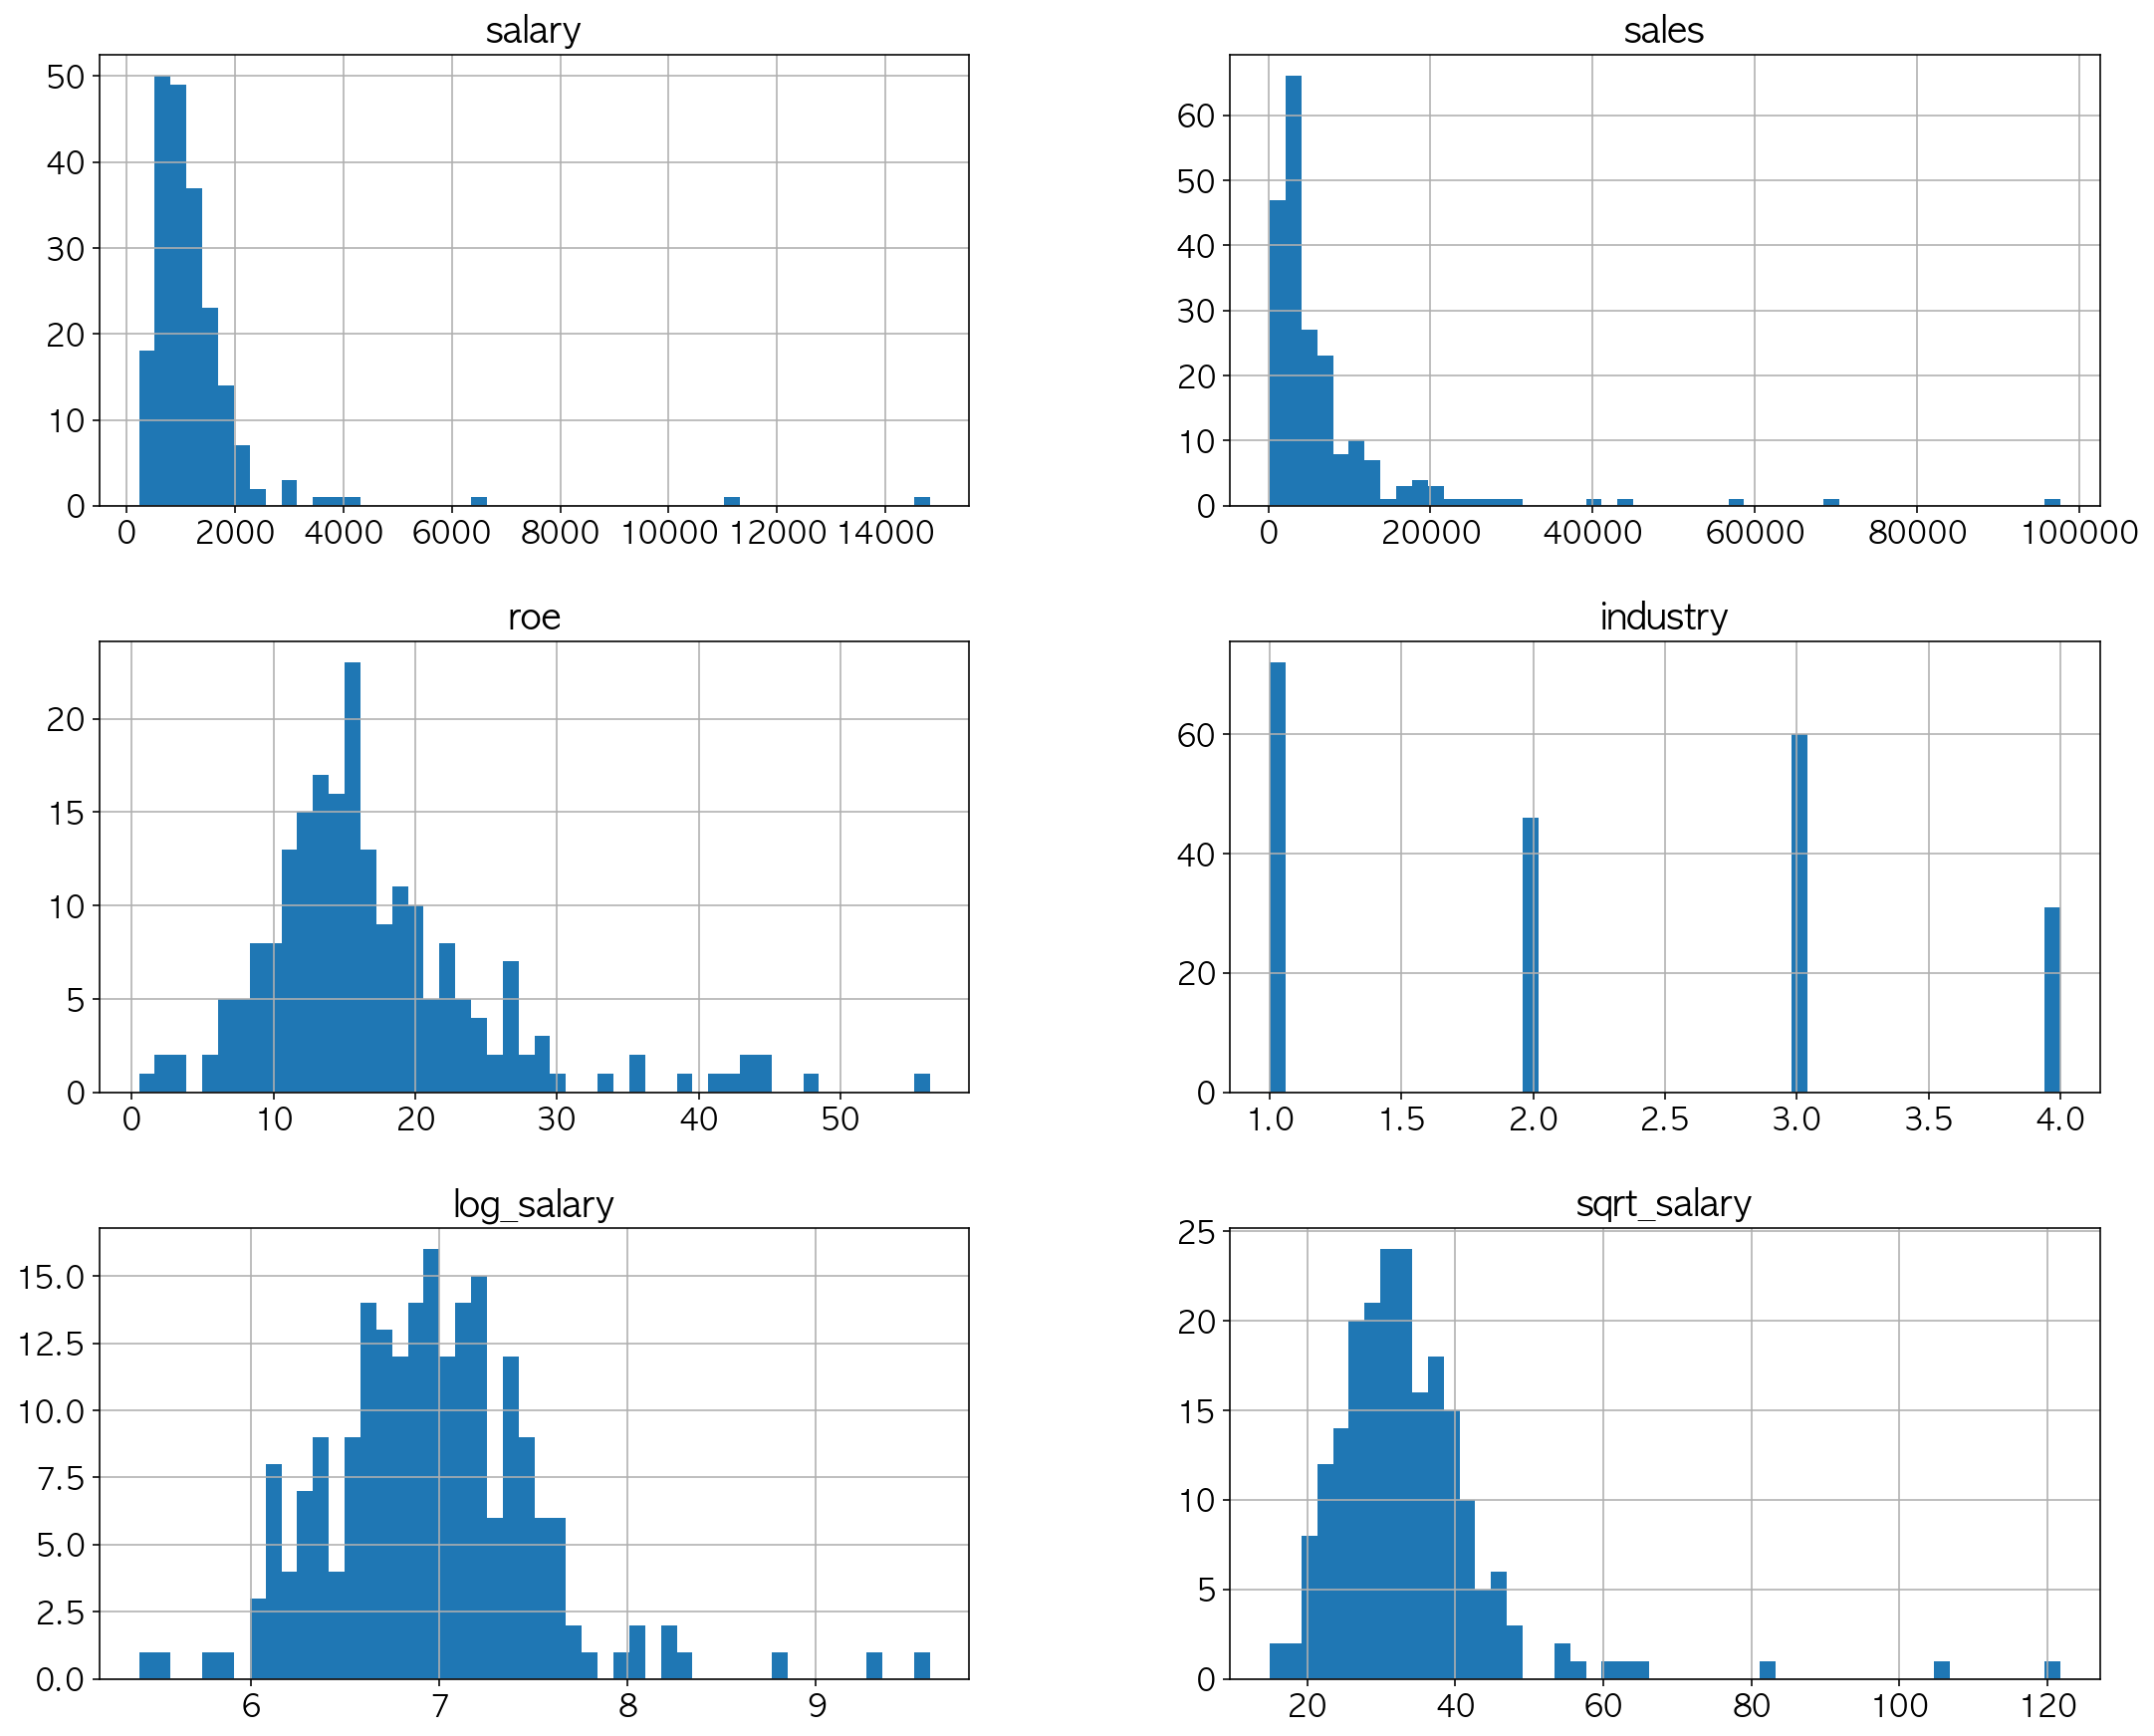

In [73]:
# 차이가 많이 날 경우 
import numpy as np

# 로그 변환
data['log_salary'] = np.log(data['salary'])

# 제곱근 변환
data['sqrt_salary'] = np.sqrt(data['salary'])

print('평균 : ', round(data['salary'].mean(), 5))
print('로그 변환 : ',round(data['log_salary'].mean(),5))
print('제곱근 변환 : ', round(data['sqrt_salary'].mean(), 5))

data.hist(bins=50, figsize=(18, 15))

### Pearson

In [19]:
data.corr(method="pearson")

,salary,sales,roe
salary,1.000000,0.119869,0.114842
sales,0.119869,1.000000,-0.055386
roe,0.114842,-0.055386,1.000000


### Spearman

In [20]:
data.corr(method="spearman")

,salary,sales,roe
salary,1.000000,0.528016,0.205984
sales,0.528016,1.000000,-0.170548
roe,0.205984,-0.170548,1.000000


### Kendall

In [21]:
data.corr(method="kendall")

,salary,sales,roe
salary,1.000000,0.363921,0.143672
sales,0.363921,1.000000,-0.123844
roe,0.143672,-0.123844,1.000000


## Scatter

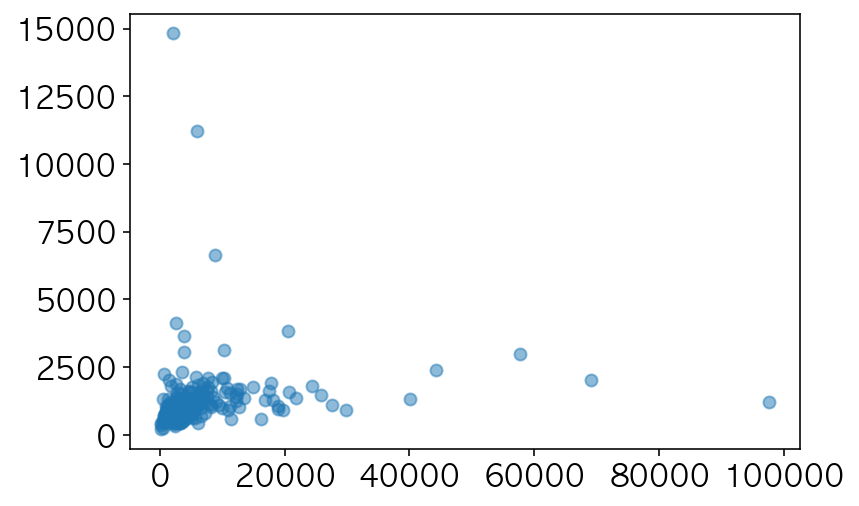

In [27]:
plt.scatter(data['sales'], data['salary'], alpha=0.5)
plt.show()

## Outlier / IQR Def

In [68]:
def get_outlier(df=None, column=None, weight=1.5):
    # target 값과 상관관계가 높은 열을 우선적으로 진행
    quantile_25 = np.percentile(df[column].values, 25)
    quantile_75 = np.percentile(df[column].values, 75)

    IQR = quantile_75 - quantile_25
    IQR_weight = IQR*weight

    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight

    outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
    return outlier_idx


print('Salary Mean / ', round(data['salary'].mean(), 3))

tmp_data = data.copy()

salary_outlier_idx = get_outlier(tmp_data, 'salary')
tmp_data.drop(salary_outlier_idx, axis = 0, inplace=True)

print('Clean Salary Outlier / ', round(tmp_data['salary'].mean(), 3))

Salary Mean /  1281.12
Clean Salary Outlier /  1071.165


## 결측치 처리

In [74]:
import pandas as pd
data = pd.read_csv('Ex_Missing.csv')
data.head(3)

,salary,sales,roe,industry
0,1095.0,27595.000000,14.1,1
1,NaN,9958.000000,10.9,1
2,NaN,6125.899902,23.5,1


In [76]:
data.isnull().sum()

salary      2
sales       2
roe         1
industry    0
dtype: int64

### 행 단위로 결측값 변수 생성

In [79]:
data['missing'] = data.isnull().sum(1)
data[data['missing']==1]

,salary,sales,roe,industry,missing
1,NaN,9958.000000,10.9,1,1
2,NaN,6125.899902,23.5,1,1
4,1368.0,NaN,13.8,1,1
5,1145.0,NaN,20.0,2,1
9,833.0,2830.000000,NaN,2,1


### 결측치 제거

In [80]:
data_del_row = data.dropna(axis=0)
data_del_row

,salary,sales,roe,industry,missing
0,1095.0,27595.000000,14.100000,1,0
3,578.0,16246.000000,5.900000,1,0
6,1078.0,2266.699951,16.400000,2,0
7,1094.0,2966.800049,16.299999,2,0
8,1237.0,4570.200195,10.500000,2,0


### 평균 대체

In [83]:
data.fillna(data.mean())

,salary,sales,roe,industry,missing
0,1095.0,27595.000000,14.100000,1,0
1,1053.5,9958.000000,10.900000,1,1
2,1053.5,6125.899902,23.500000,1,1
3,578.0,16246.000000,5.900000,1,0
4,1368.0,9069.825012,13.800000,1,1
5,1145.0,9069.825012,20.000000,2,1
6,1078.0,2266.699951,16.400000,2,0
7,1094.0,2966.800049,16.299999,2,0
8,1237.0,4570.200195,10.500000,2,0
9,833.0,2830.000000,14.600000,2,1
